In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.head())
print(test.shape)
print(train.shape)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

In [2]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
train.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [4]:
train.dtypes.sort_values(ascending=False)

HeatingQC        object
CentralAir       object
ExterCond        object
KitchenQual      object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Electrical       object
SaleCondition    object
Neighborhood     object
Heating          object
Exterior2nd      object
MasVnrType       object
BsmtFinType2     object
ExterQual        object
BsmtFinType1     object
BsmtExposure     object
BsmtCond         object
BsmtQual         object
Functional       object
Condition1       object
FireplaceQu      object
PavedDrive       object
SaleType         object
MSZoning         object
MiscFeature      object
Fence            object
                  ...  
MSSubClass        int64
SalePrice         int64
BsmtFinSF1        int64
BsmtFinSF2        int64
YrSold            int64
MoSold            int64
MiscVal           int64
PoolArea          int64
ScreenPorch       int64
3SsnPorch         int64
EnclosedPorch   

In [5]:
corr = train.corr()
corr.sort_values(by=['SalePrice'], ascending=False, inplace=True)
corr['SalePrice']

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [6]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [7]:
train.shape

(1460, 81)

Drop these columns because they have too many missing values

In [8]:
train = train.drop(labels=['MiscFeature','PoolQC', 'Fence','Alley', 'FireplaceQu'], axis=1)
test = test.drop(labels=['MiscFeature','PoolQC', 'Fence','Alley', 'FireplaceQu'], axis=1)
train.isnull().sum().sort_values()

Id                 0
SaleCondition      0
Heating            0
HeatingQC          0
CentralAir         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
SaleType           0
YrSold             0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
BsmtUnfSF          0
3SsnPorch          0
OpenPorchSF        0
WoodDeckSF         0
PavedDrive         0
GarageArea         0
                ... 
Condition1         0
Condition2         0
HouseStyle         0
OverallQual        0
OverallCond        0
BldgType           0
YearRemodAdd       0
Foundation         0
ExterCond          0
ExterQual          0
YearBuilt          0
Exterior2nd        0
Exterior1st        0
SalePrice          0
RoofMatl           0
RoofStyle          0
Electrical   

In [9]:
train = train.fillna(train.mean())
test = test.fillna(test.mean())
print(train.isnull().sum())
print(test.isnull().sum())


Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
                 ..
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageType       81
GarageYrBlt       0
GarageFinish     81
GarageCars        0
GarageArea        0
GarageQual       81
GarageCond       81
PavedDrive        0
WoodDeckSF        0


Check the correlations with target column

In [10]:
corr = train.corr()
corr.sort_values(by=['SalePrice'], ascending=False, inplace=True)
corr['SalePrice']

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

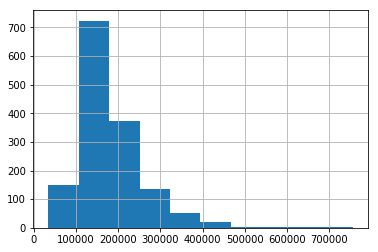

In [11]:
train['SalePrice'].hist()

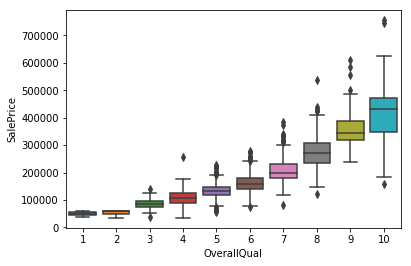

In [12]:
sns.boxplot(x='OverallQual', y="SalePrice", data=train)

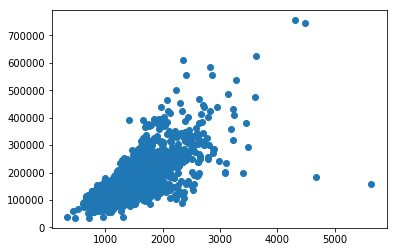

In [13]:
plt.scatter(train['GrLivArea'], train['SalePrice'])

In [14]:
object_df = train.select_dtypes(include=['object'])
object_cols = list(object_df.columns)

Convert categorical variable into dummy/indicator variables

In [15]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    df = df.drop([column_name], axis=1)
    return df

for col in object_cols:
    train = create_dummies(train, col)
    test = create_dummies(test, col)

print(train.shape)
print(test.shape)

train_cols = set(train.columns)
test_cols = set(test.columns)
print(list(train_cols - test_cols))
print(list(test_cols - train_cols))

(1460, 272)
(1459, 255)
['Exterior2nd_Other', 'Utilities_NoSeWa', 'HouseStyle_2.5Fin', 'Heating_Floor', 'Exterior1st_Stone', 'RoofMatl_ClyTile', 'Heating_OthW', 'Condition2_RRAe', 'RoofMatl_Roll', 'Condition2_RRNn', 'GarageQual_Ex', 'RoofMatl_Membran', 'Condition2_RRAn', 'RoofMatl_Metal', 'Electrical_Mix', 'Exterior1st_ImStucc', 'SalePrice']
[]


Remove some error data in which Year Sold is earlier than Year Built or Year Remodel

In [16]:
train = train[train['YearBuilt']<train['YrSold']]
train = train[train['YearRemodAdd']<train['YrSold']]
train = train[train['SalePrice']>0]
train.shape

(1335, 272)


Now we can begin training models and making predictions

In [17]:
features = list(train.columns)
target = ['SalePrice']
features.remove('Id')
cols_removed = list(train_cols - test_cols)
for col in cols_removed:
    features.remove(col)

In [18]:
print(test[features].head())
print(test[features].shape)

   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          20         80.0    11622            5            6       1961   
1          20         81.0    14267            6            6       1958   
2          60         74.0    13830            5            5       1997   
3          60         78.0     9978            6            6       1998   
4         120         43.0     5005            8            5       1992   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2          ...            \
0          1961         0.0       468.0       144.0          ...             
1          1958       108.0       923.0         0.0          ...             
2          1998         0.0       791.0         0.0          ...             
3          1998        20.0       602.0         0.0          ...             
4          1992         0.0       263.0         0.0          ...             

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0           

In [19]:
from sklearn.metrics import r2_score, mean_squared_error, make_scorer

def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return mse

def R2(y_true,y_pred):    
     r2 = r2_score(y_true, y_pred)
     return r2

def two_score(y_true,y_pred):    
    MSE(y_true,y_pred) #set score here and not below if using MSE in GridCV
    score = R2(y_true,y_pred)
    return score

def two_scorer():
    return make_scorer(two_score, greater_is_better=True) # change for false if using MSE

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

train_X, test_X, train_y, test_y = train_test_split(
    train[features], train[target], test_size=0.3,random_state=0)


reg1 = LinearRegression().fit(train_X, train_y)

predictions = reg1.predict(test_X)
lrmse = np.sqrt(metrics.mean_squared_error(np.log(test_y), np.log(predictions)))
lrmse

0.1708749244499437

In [21]:
print(test_X.head())
print(test_X.shape)

      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
1108          60    70.049958     8063            6            5       2000   
484           20    70.049958     7758            5            7       1962   
498           20    65.000000     7800            5            7       1967   
273           20    80.000000     9600            6            6       1958   
1071          60    78.000000    11700            6            6       1968   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2          ...            \
1108          2000         0.0           0           0          ...             
484           2001         0.0         588           0          ...             
498           2004        89.0         450           0          ...             
273           1988       183.0         620         620          ...             
1071          1968         0.0         298           0          ...             

      SaleType_ConLw  SaleType_New  Sa

In [22]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

reg2 = Lasso()
grid_values = {'alpha': [0.01,0.1,1,5,10]}

grid_clf_acc = GridSearchCV(reg2, param_grid = grid_values, scoring=two_scorer())
grid_clf_acc.fit(train_X, train_y)
print('Grid best parameter (max. score): ', grid_clf_acc.best_params_)
print('Grid best score: ', grid_clf_acc.best_score_)

('Grid best parameter (max. score): ', {'alpha': 10})
('Grid best score: ', 0.8821260325190291)


In [23]:
reg2 = Lasso(alpha=grid_clf_acc.best_params_['alpha']).fit(train_X, train_y)

predictions = reg2.predict(test_X)
lrmse = np.sqrt(metrics.mean_squared_error(np.log(test_y), np.log(predictions)))
lrmse

0.15670712702902953

In [24]:
from sklearn.linear_model import Ridge

reg3 = Ridge()
grid_values = {'alpha': [0.01,0.1,1,5,10]}

grid_clf_acc = GridSearchCV(reg3, param_grid = grid_values, scoring=two_scorer())
grid_clf_acc.fit(train_X, train_y)
print('Grid best parameter (max. score): ', grid_clf_acc.best_params_)
print('Grid best score: ', grid_clf_acc.best_score_)

('Grid best parameter (max. score): ', {'alpha': 10})
('Grid best score: ', 0.8962771115951707)


In [25]:
reg3 = Ridge(alpha=grid_clf_acc.best_params_['alpha']).fit(train_X, train_y)

predictions = reg3.predict(test_X)
lrmse = np.sqrt(metrics.mean_squared_error(np.log(test_y), np.log(predictions)))
lrmse

0.13640750673873148

Using GridSearch to find the best parameters for Gradient Boosting Regressor

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

reg4 = GradientBoostingRegressor()

grid_values = {'loss': ['ls', 'lad', 'huber', 'quantile'],
              'criterion' : ['friedman_mse','mse'],
              'learning_rate' : [0.01,0.1,1],
              'min_samples_leaf': [i for i in range(1,5)],
              'min_samples_split': [i for i in range(2,5)]}
grid_clf_acc = GridSearchCV(reg4, param_grid = grid_values, scoring=two_scorer())
grid_clf_acc.fit(train_X, train_y)
print('Grid best parameter (max. score): ', grid_clf_acc.best_params_)
print('Grid best score: ', grid_clf_acc.best_score_)

('Grid best parameter (max. score): ', {'min_samples_split': 3, 'loss': 'huber', 'learning_rate': 0.1, 'criterion': 'mse', 'min_samples_leaf': 2})
('Grid best score: ', 0.8865230475422877)


In [27]:
reg4 = GradientBoostingRegressor(min_samples_split=grid_clf_acc.best_params_['min_samples_split'],
                                loss=grid_clf_acc.best_params_['loss'],
                                learning_rate=grid_clf_acc.best_params_['learning_rate'],
                                criterion=grid_clf_acc.best_params_['criterion'],
                                min_samples_leaf=grid_clf_acc.best_params_['min_samples_leaf']).fit(train_X, train_y)

predictions = reg4.predict(test_X)
lrmse = np.sqrt(metrics.mean_squared_error(np.log(test_y), np.log(predictions)))
print (lrmse)
rmse = np.sqrt(metrics.mean_squared_error(test_y, predictions))
print (rmse)

0.1212437467761064
25143.589918451573


In [28]:
#Predict final fares for submission

GB_Predictions = reg4.predict(test[features])
#Set up predictions for a submittable dataframe
GB_submission = pd.DataFrame({"Id": test['Id'],"SalePrice": GB_Predictions},
                                 columns = ['Id','SalePrice'])
GB_submission.to_csv('GB_submission.csv',index=False)

In [29]:
from sklearn.neighbors import KNeighborsRegressor

reg5 = KNeighborsRegressor().fit(train_X, train_y)

predictions = reg5.predict(test_X)
lrmse = np.sqrt(metrics.mean_squared_error(np.log(test_y), np.log(predictions)))
lrmse

0.22949465076580397

In [30]:
from sklearn.neural_network import MLPRegressor

reg6 = MLPRegressor().fit(train_X, train_y)

predictions = reg6.predict(test_X)
lrmse = np.sqrt(metrics.mean_squared_error(np.log(test_y), np.log(predictions)))
lrmse

0.23869407276529359

In [31]:
from sklearn.ensemble import RandomForestRegressor

reg7 = RandomForestRegressor().fit(train_X, train_y)

predictions = reg7.predict(test_X)
lrmse = np.sqrt(metrics.mean_squared_error(np.log(test_y), np.log(predictions)))
lrmse

0.1451043197145062